#### One Hot Encoding - variables with many categories

We observed in the previous lecture that if a categorical variable contains multiple labels, then by re-encoding them using one hot encoding we will expand the feature space dramatically.

In [1]:
import pandas as pd
import numpy as np

# let's load the mercedes benz dataset for demonstration, only the categorical variables

data = pd.read_csv('/Users/nandrajog/Downloads/mercedes-benz-greener-manufacturing/mercedesbenz.csv',low_memory=False)
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
cropped_data =data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]

In [8]:
for col in cropped_data:
    print(col, ':',len(cropped_data[col].unique()),'label')

X1 : 27 label
X2 : 44 label
X3 : 7 label
X4 : 4 label
X5 : 29 label
X6 : 12 label


In [12]:
pd.get_dummies(data, drop_first=True).shape

(4209, 557)

We can see that from just 6 initial categorical variables, we end up with 117 new variables.

What can we do instead?

We can hot encoding to the 10 most frequent labels of the variable. This means that they would make one binary variable for each of the 10 most frequent labels only.
Thus, the 10 new dummy variables indicate if one of the 10 most frequent labels is present (1) or not (0) for a particular observation.

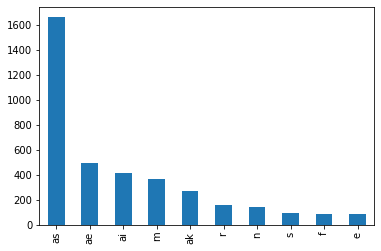

In [22]:
data.X2.value_counts().head(10).plot.bar()

In [45]:
# let's make a list with the most frequent categories of the variable
top_10 = []
for i in (data.X2.value_counts().index[:10]):
    top_10.append(i)

In [46]:
top_10


['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [47]:
for label in top_10:
    data[label] = np.where(data['X2'] == label,1,0)

In [49]:
data[['X2']+top_10]

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,as,1,0,0,0,0,0,0,0,0,0
4205,t,0,0,0,0,0,0,0,0,0,0
4206,r,0,0,0,0,0,1,0,0,0,0
4207,e,0,0,0,0,0,0,0,0,0,1


In [50]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label, 1, 0)


In [53]:
one_hot_top_x(cropped_data, 'X2', top_10)
cropped_data.head()

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0
